In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


df = pd.read_csv('student_details_csv.csv')
df.head(10)


,Reg_no,Gender,Degree,Tenth_marks,Eleventh_marks,Twelfth_marks,Income,Family_size,Objective,Study_pattern,Time_spent_pattern,Extra_curricular_activity,Paused_resumed
0,st101,Female,II PU/12th,90.8,91.1,93.6,"Upper middle income ( 1,00,000 - 2,00,000)",3,"Yes, clear and specific.",4-6 days/week,3-4 hrs,Sports and Physical Activities,Paused and resumed due to academics.
1,st102,Male,II PU/12th,88.5,93,94.3,"Upper middle income ( 1,00,000 - 2,00,000)",4,Not specific enough.,2-3 days/week,1-2 hrs,Sports and Physical Activities,Completely stopped because of academics.
2,st103,Female,II PU/12th,98.8,97.3,97.8,"Middle income (50,000 - 1,00, 000)",4,"Yes, clear and specific.",Everyday,2-3 hrs,Others,Paused and resumed due to academics.
3,st104,Female,II PU/12th,90.8,96,92.0,"High income ( > 2,00,000)",above 5,"Yes, clear and specific.",4-6 days/week,2-3 hrs,Arts and Culture,Paused and resumed due to academics.
4,st105,Male,II PU/12th,90.6,91,96.0,"Upper middle income ( 1,00,000 - 2,00,000)",5,Not specific enough.,2-3 days/week,1-2 hrs,Sports and Physical Activities,Paused and resumed due to academics.
5,st106,Female,II PU/12th,96.0,98.17,98.8,"Middle income (50,000 - 1,00, 000)",5,"Yes, clear and specific.",Everyday,2-3 hrs,Sports and Physical Activities,Completely stopped because of academics.
6,st107,Female,II PU/12th,97.8,99,99.0,"High income ( > 2,00,000)",5,Not specific enough.,Everyday,2-3 hrs,Fitness and wellness,Completely stopped because of academics.
7,st108,Male,II PU/12th,91.0,96.8,96.0,"Middle income (50,000 - 1,00, 000)",3,"Yes, clear and specific.",2-3 days/week,3-4 hrs,Fitness and wellness,Never had to pause or stop because of academics.
8,st109,Male,II PU/12th,96.6,96.3,96.3,"High income ( > 2,00,000)",5,"Yes, clear and specific.",Everyday,4-5 hrs,Hobbies and Interest,Paused and resumed due to academics.
9,st110,Female,II PU/12th,95.0,96.7,97.5,"Middle income (50,000 - 1,00, 000)",3,"Yes, clear and specific.",4-6 days/week,2-3 hrs,Sports and Physical Activities,Completely stopped because of academics.


In [4]:
df = df.fillna(df.mean())

# Encode categorical variables
df = pd.get_dummies(df, columns=['Study_pattern', 'Extra_curricular_activity'], drop_first=True)

# Define the features (X) and the target variable (y)
X = df[['Study_pattern_Yes', 'Extra_curricular_activity_Yes']]  # assuming 'Yes' is the positive response
y = df['Twelfth_marks']  # Assuming 'Twelfth_marks' is the target

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict the marks on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Display the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Visualization of predicted vs actual marks
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Twelfth Marks')
plt.ylabel('Predicted Twelfth Marks')
plt.title('Actual vs Predicted Twelfth Marks')
plt.show()


TypeError: can only concatenate str (not "int") to str

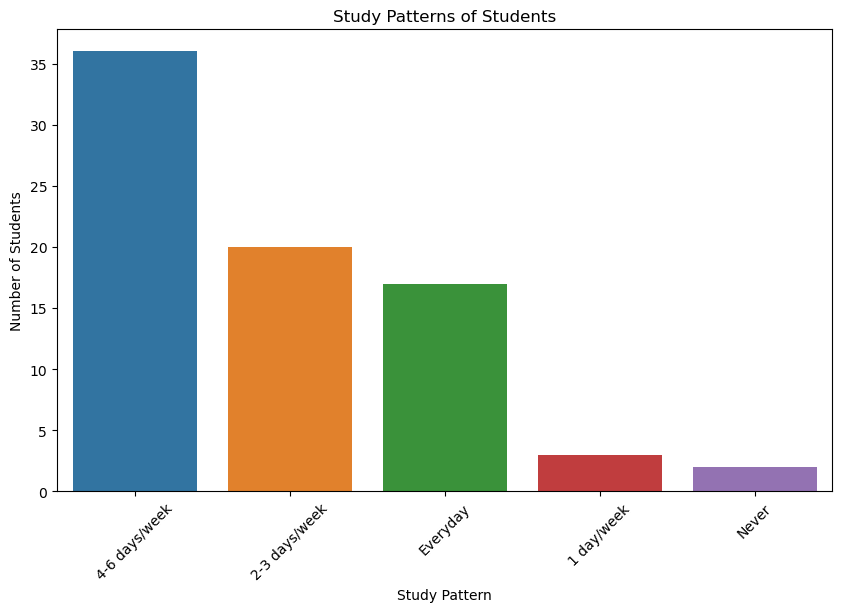

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_unclean, x='Study_pattern', order=df_unclean['Study_pattern'].value_counts().index)
plt.title('Study Patterns of Students')
plt.xlabel('Study Pattern')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.show()

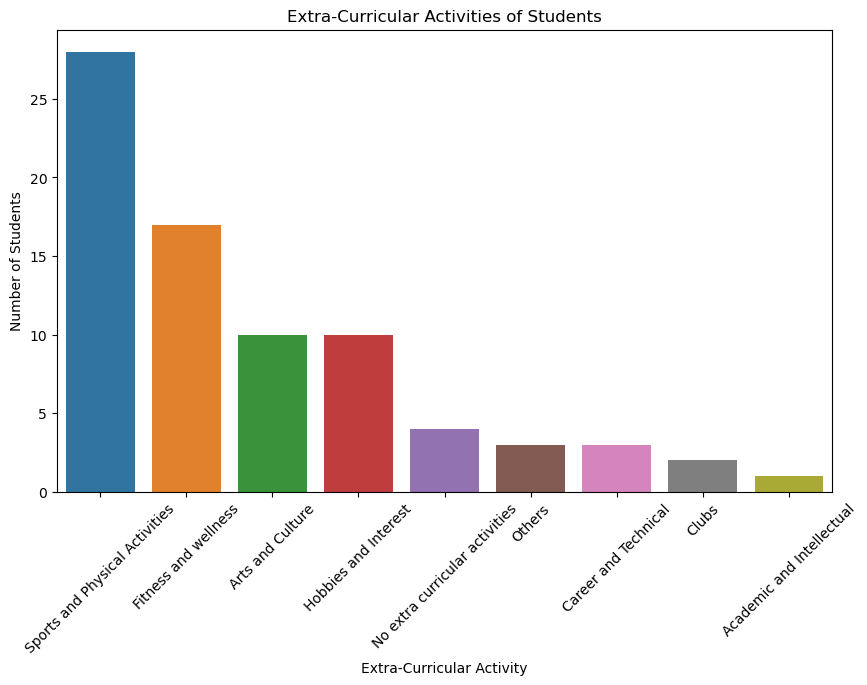

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_unclean, x='Extra_curricular_activity', order=df_unclean['Extra_curricular_activity'].value_counts().index)
plt.title('Extra-Curricular Activities of Students')
plt.xlabel('Extra-Curricular Activity')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.show()


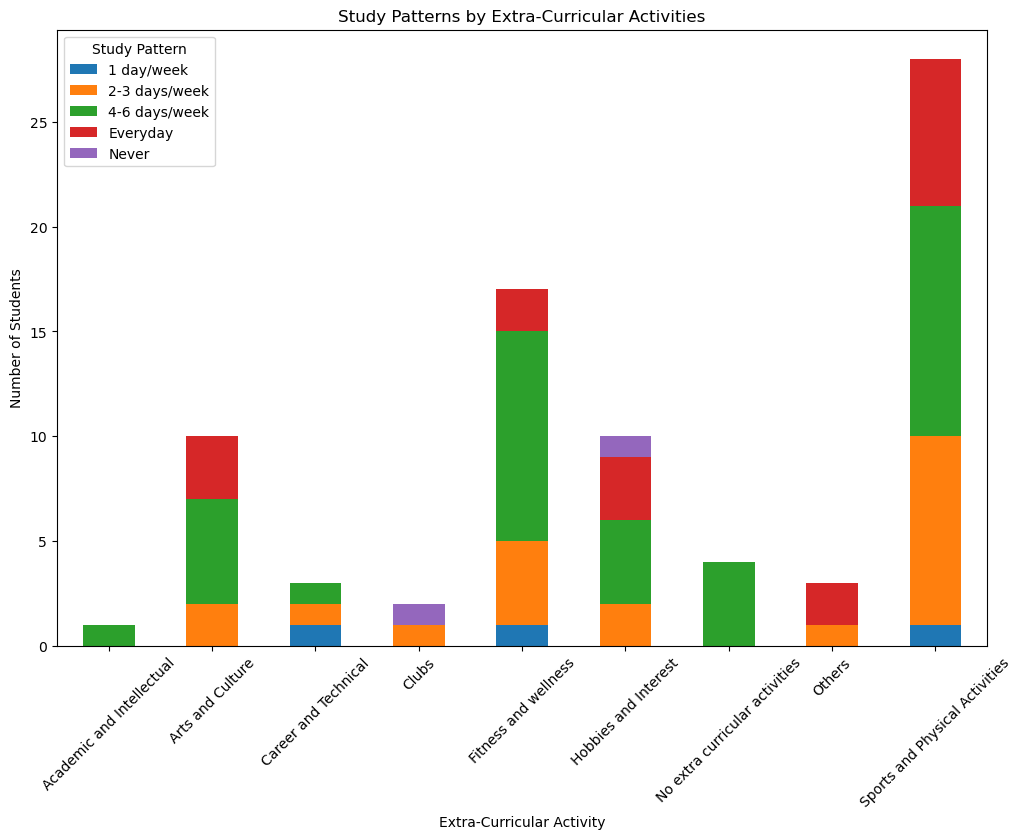

In [7]:
study_activity_counts = df_unclean.groupby(['Extra_curricular_activity', 'Study_pattern']).size().unstack()

study_activity_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Study Patterns by Extra-Curricular Activities')
plt.xlabel('Extra-Curricular Activity')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Study Pattern')
plt.show()

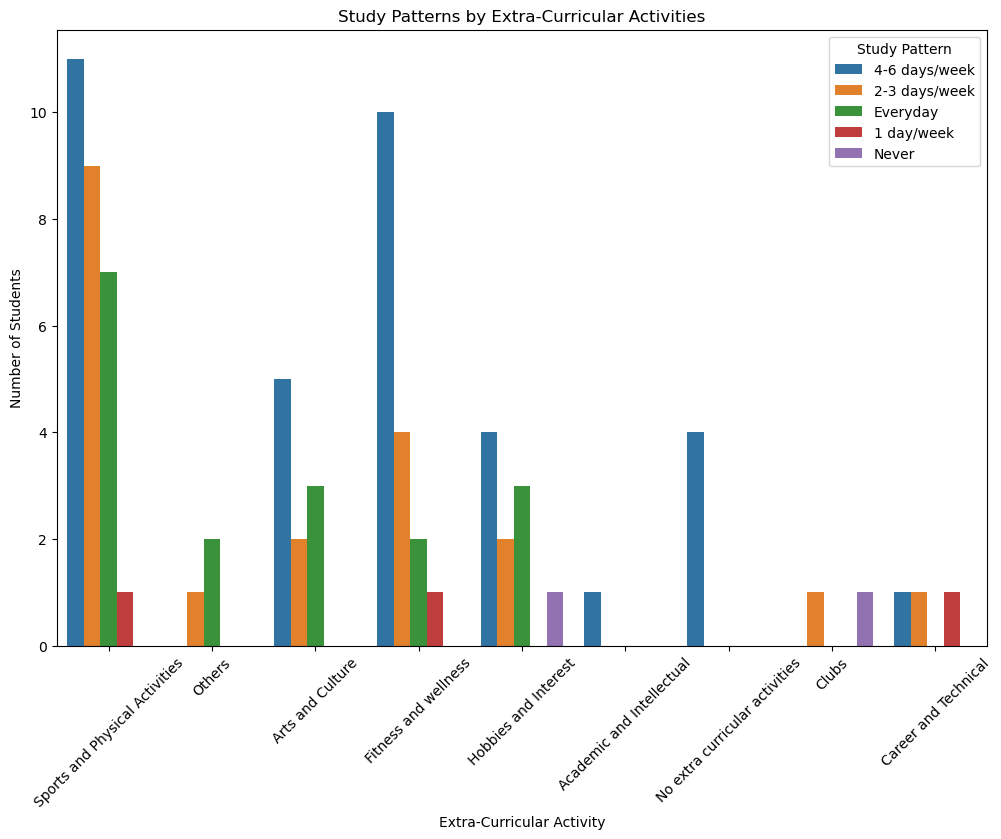

In [8]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df_unclean, x='Extra_curricular_activity', hue='Study_pattern')
plt.title('Study Patterns by Extra-Curricular Activities')
plt.xlabel('Extra-Curricular Activity')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Study Pattern')
plt.show()

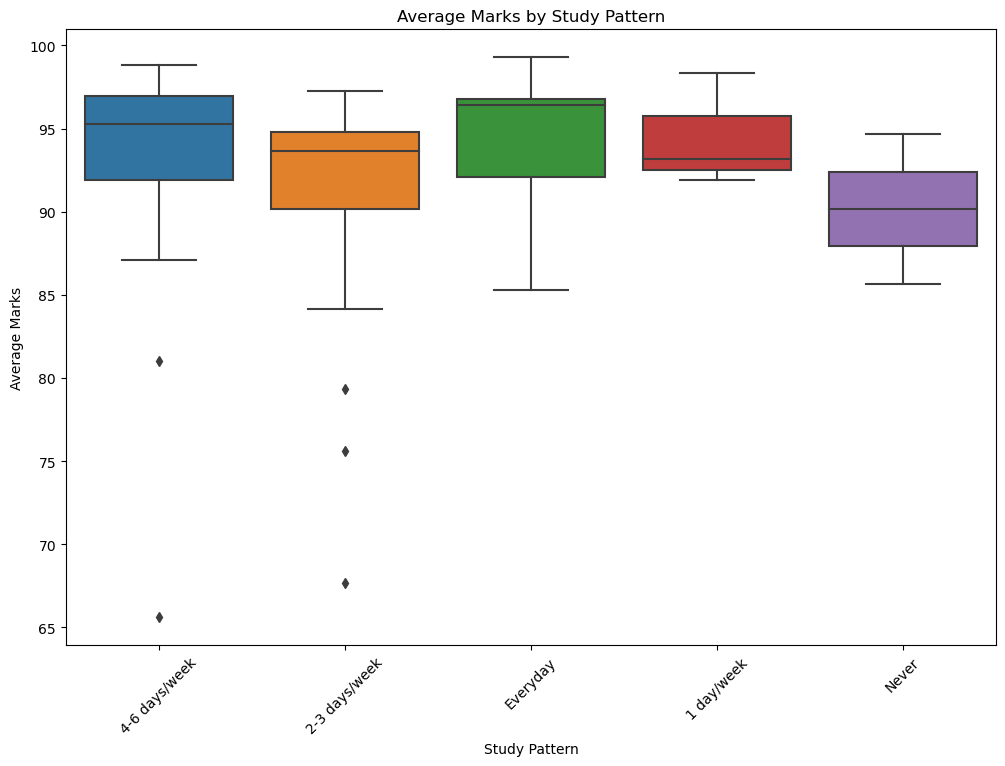

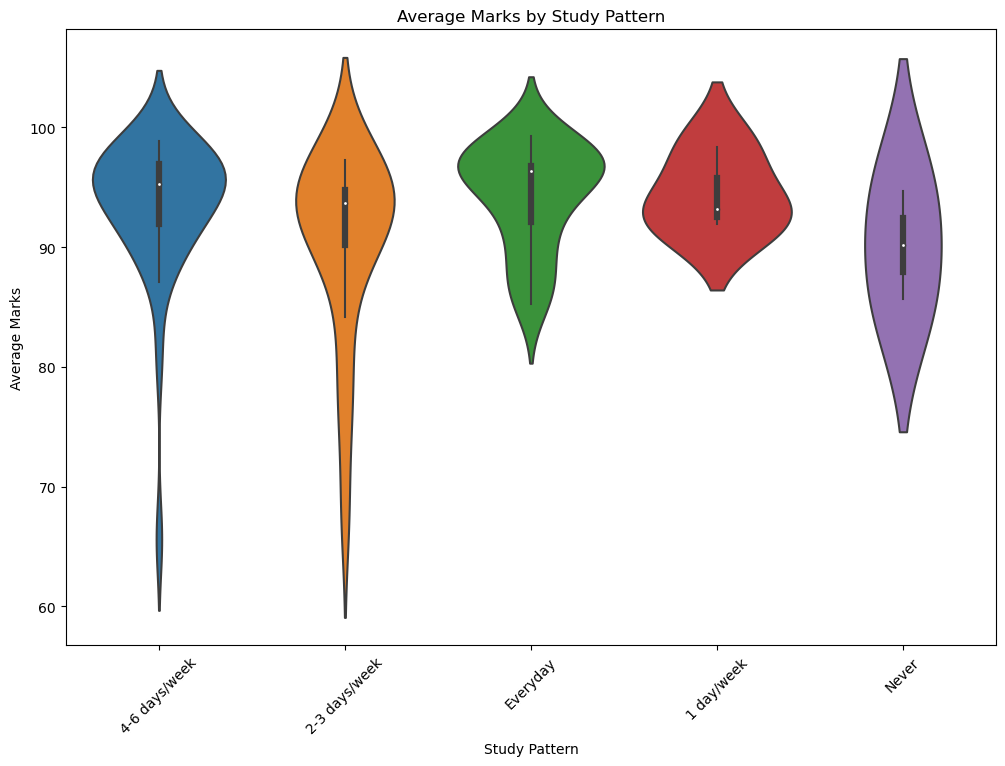

In [9]:
df_unclean['Tenth_marks'] = pd.to_numeric(df_unclean['Tenth_marks'], errors='coerce')
df_unclean['Eleventh_marks'] = pd.to_numeric(df_unclean['Eleventh_marks'], errors='coerce')
df_unclean['Twelfth_marks'] = pd.to_numeric(df_unclean['Twelfth_marks'], errors='coerce')

# Calculate the average marks
df_unclean['Average_marks'] = df_unclean[['Tenth_marks', 'Eleventh_marks', 'Twelfth_marks']].mean(axis=1)

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_unclean, x='Study_pattern', y='Average_marks')
plt.title('Average Marks by Study Pattern')
plt.xlabel('Study Pattern')
plt.ylabel('Average Marks')
plt.xticks(rotation=45)
plt.show()

# Plotting Violin Plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=df_unclean, x='Study_pattern', y='Average_marks')
plt.title('Average Marks by Study Pattern')
plt.xlabel('Study Pattern')
plt.ylabel('Average Marks')
plt.xticks(rotation=45)
plt.show()

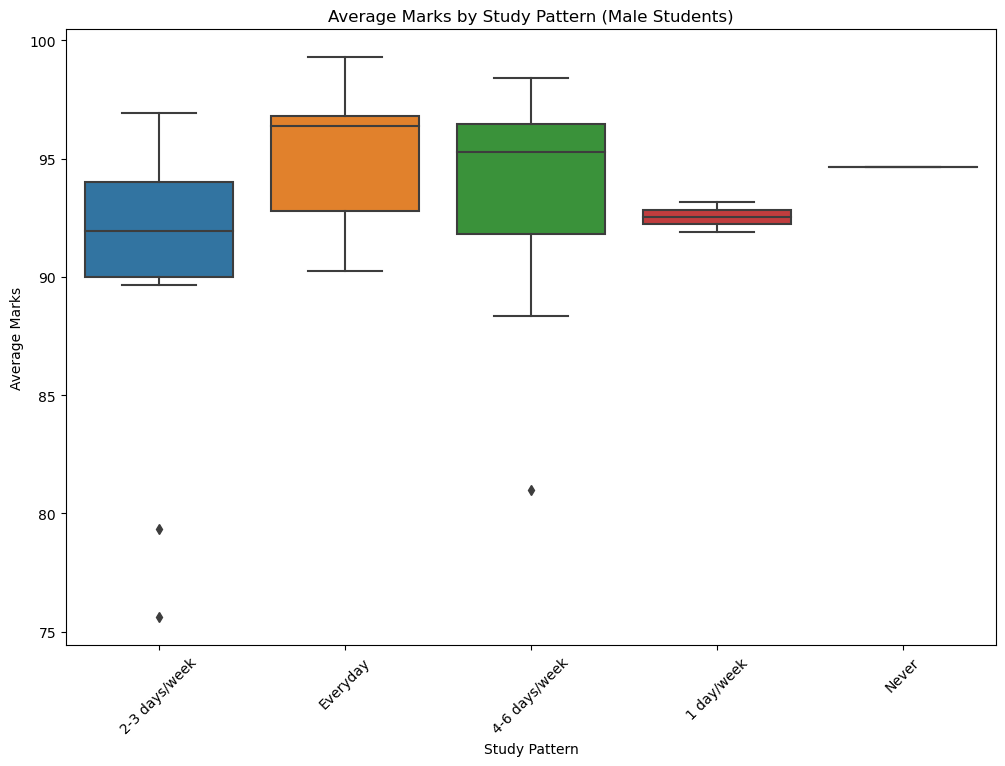

In [10]:
df_unclean['Tenth_marks'] = pd.to_numeric(df_unclean['Tenth_marks'], errors='coerce')
df_unclean['Eleventh_marks'] = pd.to_numeric(df_unclean['Eleventh_marks'], errors='coerce')
df_unclean['Twelfth_marks'] = pd.to_numeric(df_unclean['Twelfth_marks'], errors='coerce')

# Calculate the average marks
df_unclean['Average_marks'] = df_unclean[['Tenth_marks', 'Eleventh_marks', 'Twelfth_marks']].mean(axis=1)

# Separate data by gender
male_data = df_unclean[df_unclean['Gender'] == 'Male']
female_data = df_unclean[df_unclean['Gender'] == 'Female']

# Plotting Box Plot for Male Students
plt.figure(figsize=(12, 8))
sns.boxplot(data=male_data, x='Study_pattern', y='Average_marks')
plt.title('Average Marks by Study Pattern (Male Students)')
plt.xlabel('Study Pattern')
plt.ylabel('Average Marks')
plt.xticks(rotation=45)
plt.show()




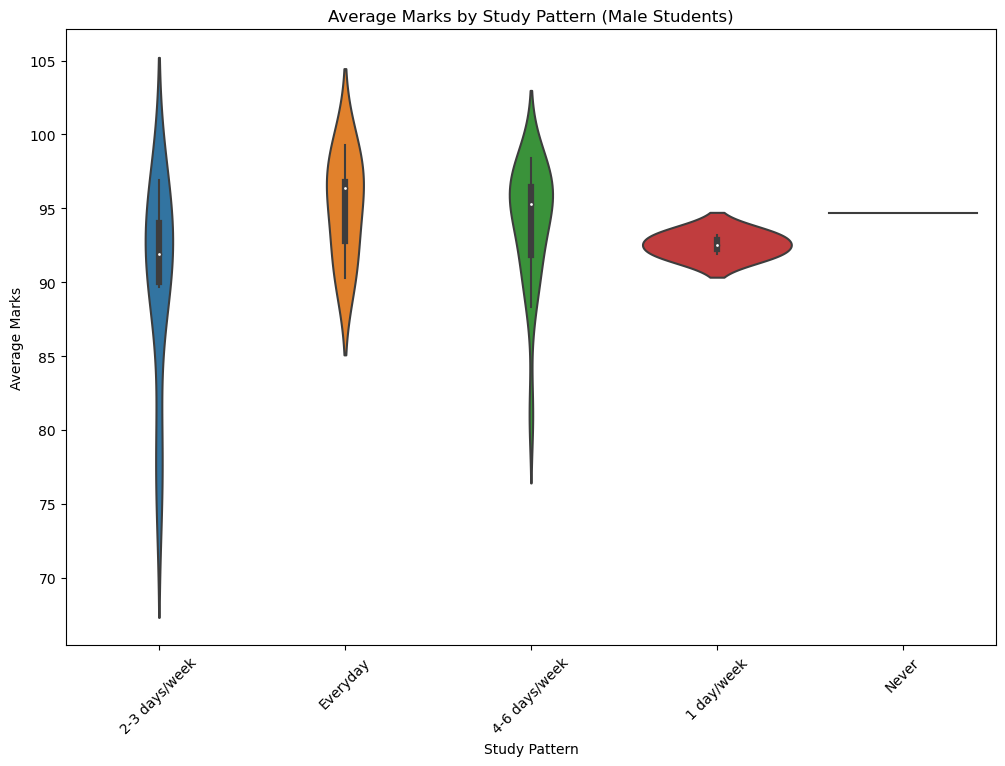

In [11]:
# Plotting Violin Plot for Male Students
plt.figure(figsize=(12, 8))
sns.violinplot(data=male_data, x='Study_pattern', y='Average_marks')
plt.title('Average Marks by Study Pattern (Male Students)')
plt.xlabel('Study Pattern')
plt.ylabel('Average Marks')
plt.xticks(rotation=45)
plt.show()



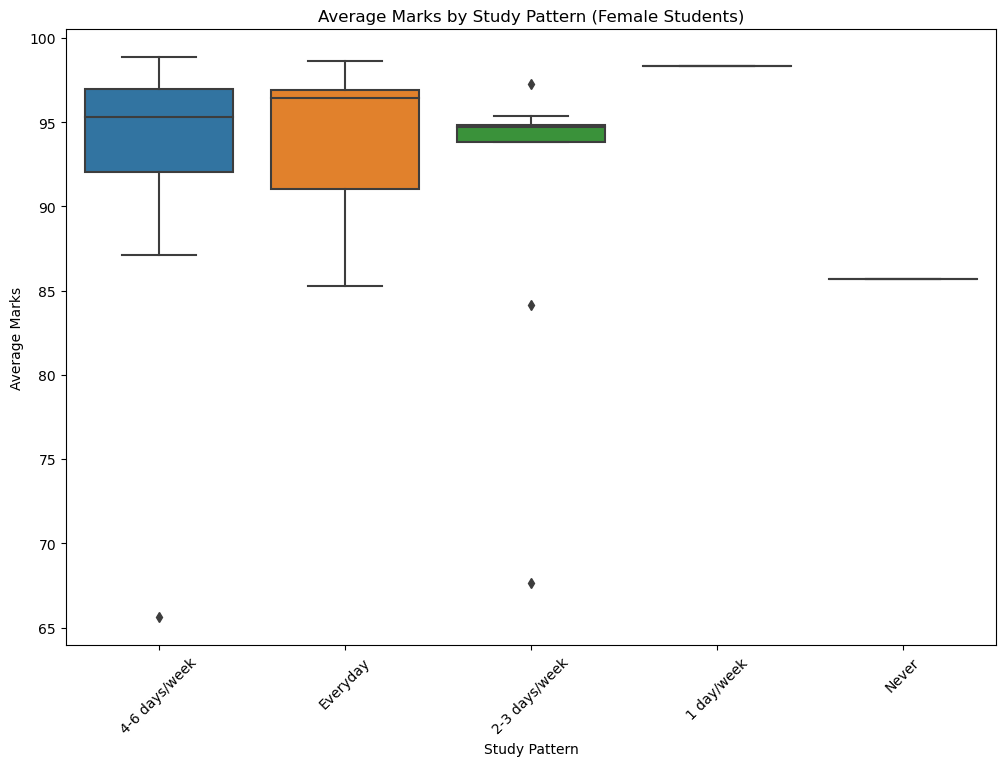

In [12]:


# Plotting Box Plot for Female Students
plt.figure(figsize=(12, 8))
sns.boxplot(data=female_data, x='Study_pattern', y='Average_marks')
plt.title('Average Marks by Study Pattern (Female Students)')
plt.xlabel('Study Pattern')
plt.ylabel('Average Marks')
plt.xticks(rotation=45)
plt.show()

#

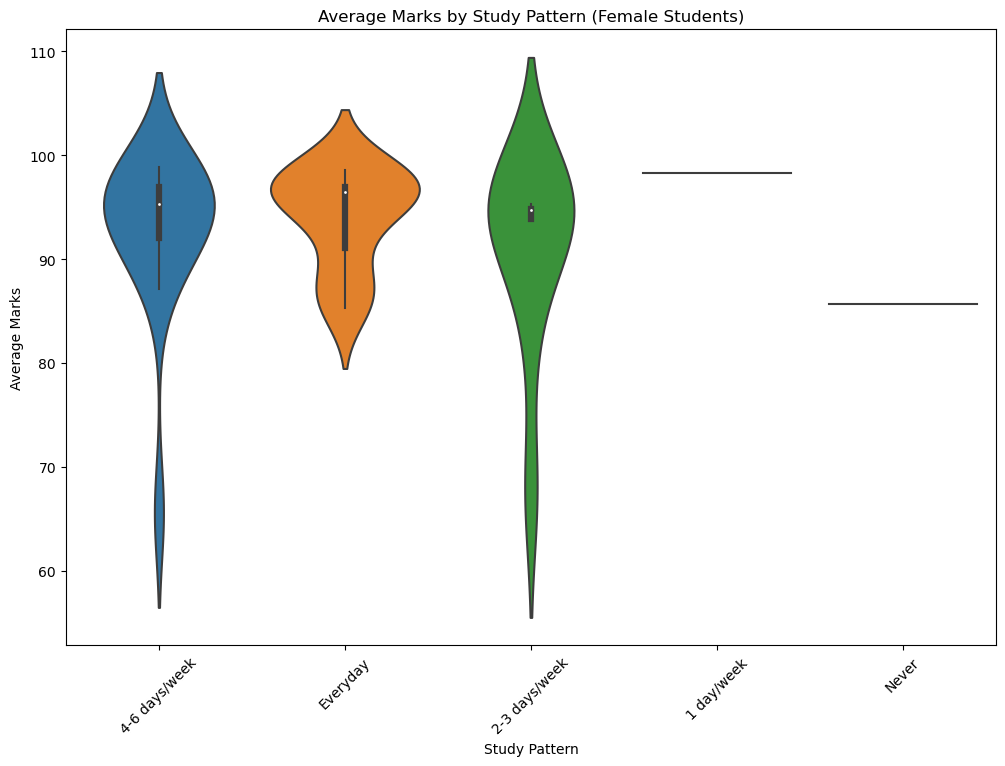

In [13]:


# Plotting Violin Plot for Female Students
plt.figure(figsize=(12, 8))
sns.violinplot(data=female_data, x='Study_pattern', y='Average_marks')
plt.title('Average Marks by Study Pattern (Female Students)')
plt.xlabel('Study Pattern')
plt.ylabel('Average Marks')
plt.xticks(rotation=45)
plt.show()

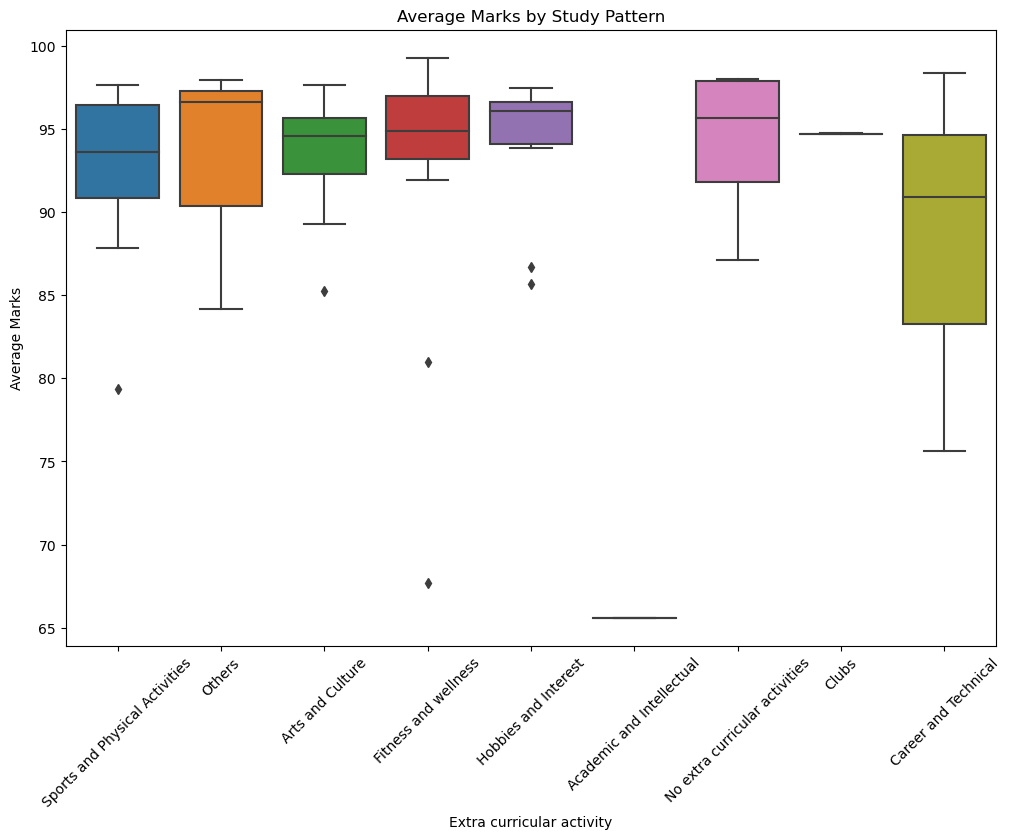

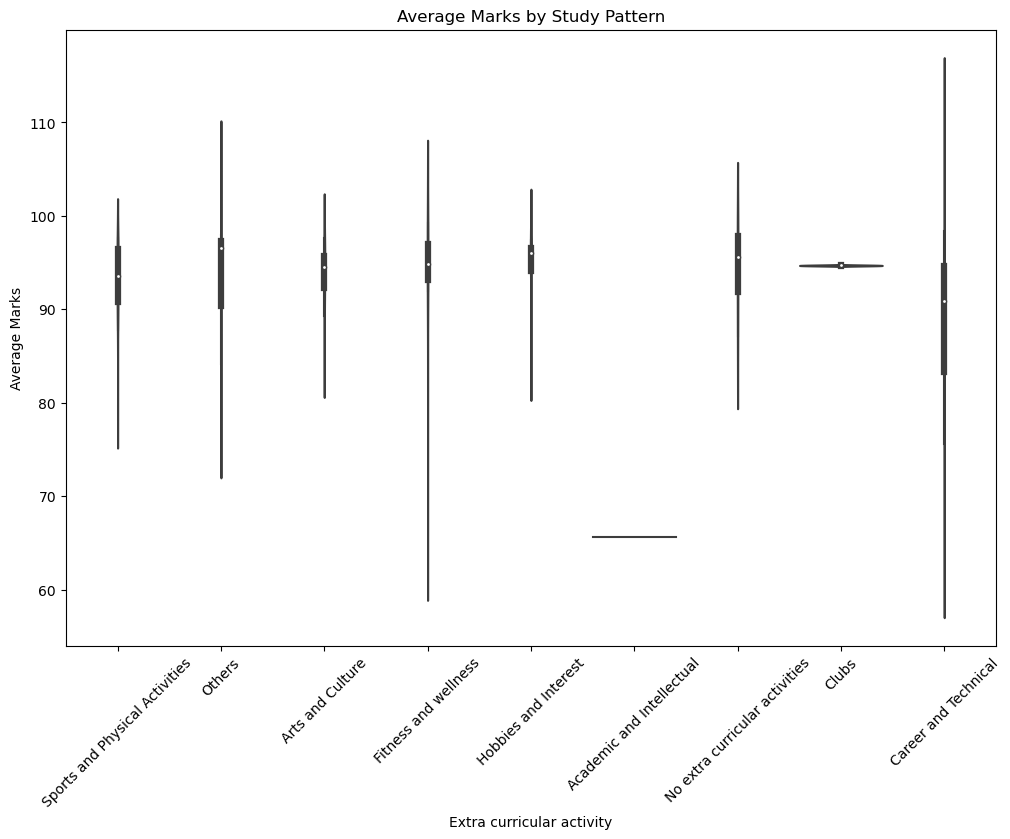

In [16]:
df_unclean['Tenth_marks'] = pd.to_numeric(df_unclean['Tenth_marks'], errors='coerce')
df_unclean['Eleventh_marks'] = pd.to_numeric(df_unclean['Eleventh_marks'], errors='coerce')
df_unclean['Twelfth_marks'] = pd.to_numeric(df_unclean['Twelfth_marks'], errors='coerce')

# Calculate the average marks
df_unclean['Average_marks'] = df_unclean[['Tenth_marks', 'Eleventh_marks', 'Twelfth_marks']].mean(axis=1)

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_unclean, x='Extra_curricular_activity', y='Average_marks')
plt.title('Average Marks by Study Pattern')
plt.xlabel('Extra curricular activity')
plt.ylabel('Average Marks')
plt.xticks(rotation=45)
plt.show()

# Plotting Violin Plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=df_unclean, x='Extra_curricular_activity', y='Average_marks')
plt.title('Average Marks by Study Pattern')
plt.xlabel('Extra curricular activity')
plt.ylabel('Average Marks')
plt.xticks(rotation=45)
plt.show()

/var/folders/3l/gdd3v04x2_n1wbpbz67f38fr0000gn/T/ipykernel_33884/3951925885.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_unclean, x='Average_marks', hue='Income', fill=True, palette='viridis', common_norm=False, alpha=0.5)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


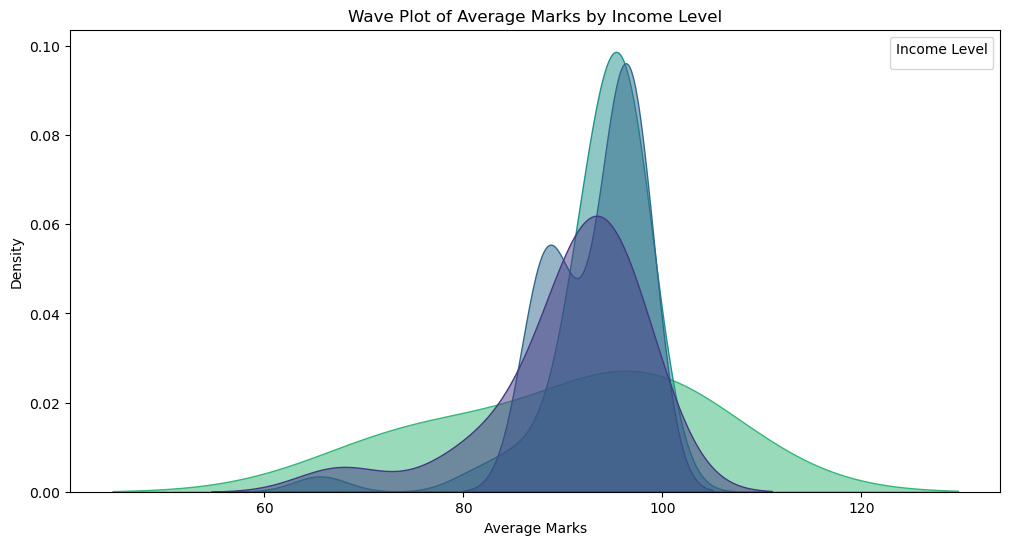

In [19]:
income_mapping = {
    'Middle income (50,000 - 1,00, 000)': 'Middle income',
    'Upper middle income ( 1,00,000 - 2,00,000)': 'Upper middle income',
    'High income ( >  2,00,000)': 'High income'
}
df_unclean['Income'] = df_unclean['Income'].replace(income_mapping)

# Convert marks columns to numerical types
df_unclean['Tenth_marks'] = pd.to_numeric(df_unclean['Tenth_marks'], errors='coerce')
df_unclean['Eleventh_marks'] = pd.to_numeric(df_unclean['Eleventh_marks'], errors='coerce')
df_unclean['Twelfth_marks'] = pd.to_numeric(df_unclean['Twelfth_marks'], errors='coerce')

# Create a new column for the average marks
df_unclean['Average_marks'] = df_unclean[['Tenth_marks', 'Eleventh_marks', 'Twelfth_marks']].mean(axis=1)

# Drop rows with missing Average_marks
df_unclean = df_unclean.dropna(subset=['Average_marks'])

# Plot the wave plot for income levels and average marks
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_unclean, x='Average_marks', hue='Income', fill=True, palette='viridis', common_norm=False, alpha=0.5)
plt.title('Wave Plot of Average Marks by Income Level')
plt.xlabel('Average Marks')
plt.ylabel('Density')
plt.legend(title='Income Level')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_unclean, x='Study_pattern', order=df_unclean['Study_pattern'].value_counts().index)
plt.title('Study Patterns of Students')
plt.xlabel('Study Pattern')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.show()


